In [2]:
#Une fois le notebook créé, on peux y ré-accéder à tout instant en ouvrant une console,
#en nous plaçant dans le répertoire qui contient notre notebook par la commande : jupyter notebook nomFichier.ipynb'''

#---------------- IMPLEMENTATION DU PROBLEME DE MONTY HALL -----------------------------------------------------------------


En changeant de porte, le joueur a gagné 6591 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3240 sur 10000 parties.
En jouant aléatoirement, le joueur a gagné 4963 sur 10000 parties.


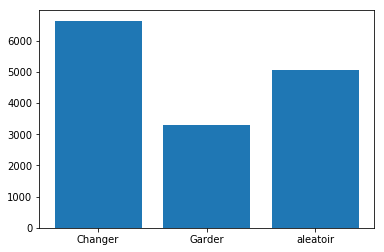

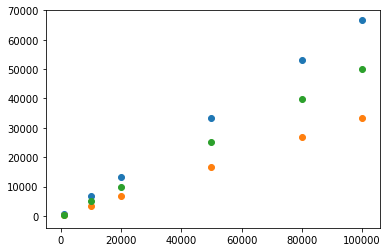

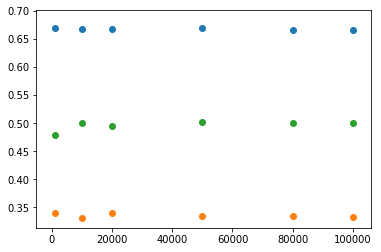

In [29]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline
   
# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt
#---------------------------------------------------------

# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    # Utilise l'horloge système pour initialiser le générateur de 
    
    
# nombres pseudo-aléatoires.
seed()
#---------------------------------------------------------

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte


#---------------------------------------------------------

def play_game_aleatoir():
    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix est pris aléatoirement
    boolean = randint(0,1)
    if boolean == 0:
        deuxieme_choix = portes[0]
    elif boolean == 1:
        deuxieme_choix = premier_choix
    
    return deuxieme_choix == bonne_porte
#---------------------------------------------------------
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]
#---------------------------------------------------------

def play_aleatoir(nb_tours):
    return [1 if play_game_aleatoir() else 0 for i in range(nb_tours)]
#---------------------------------------------------------

print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

print("En jouant aléatoirement, le joueur a gagné {} sur 10000 parties."
      .format(sum(play_aleatoir(10000))))

#1ER GRAPHIQUE ---------------------------------------------------------

# plot renvoie un objet, que l'on pourra manipuler plus tard pour
# personnaliser le graphique
#plot = plt.plot(play(Strategie.CHANGER, 100))
#plot = plt.scatter(range(10000),play(Strategie.CHANGER, 10000))

plot = plt.bar(
               [1,2,3],
               [sum(play(Strategie.CHANGER, 10000)), sum(play(Strategie.GARDER, 10000)),sum(play_aleatoir(10000))],
               tick_label=["Changer","Garder","aleatoir"]
              )
#---------------------------------------------------------

gains_changer = []
gains_garder = []
gains_aleatoir = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
#samples =  [10, 20, 30, 40, 50, 60]

i=0
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    #print(gains_changer[i])
    i=i+1
    
j=0
for tours in samples:
    gains_garder.append(play(Strategie.GARDER, tours))
    #print(gains_garder[j])
    j=j+1

k=0
for tours in samples:
    gains_aleatoir.append(play_aleatoir(tours))
    #print(gains_aleatoir[k])
    k=k+1
# 2EME GRAPHIQUE --------------------------------------------------------
figure = plt.figure()
plot1 = plt.scatter(samples, [sum(x)for x in gains_changer])
plot1 = plt.scatter(samples, [sum(x) for x in gains_garder])
plot1 = plt.scatter(samples, [sum(x) for x in gains_aleatoir])
# 3EME GRAPHIQUE ---------------------------------------------------------

from statistics import mean
figure2 = plt.figure()
plot2 = plt.scatter(samples, [mean(x) for x in gains_changer])
plot2 = plt.scatter(samples, [mean(x) for x in gains_garder])
plot2 = plt.scatter(samples, [mean(x) for x in gains_aleatoir])
